<a href="https://colab.research.google.com/github/nzungizelab/Compare-2-ML-model-linear-regression-and-KNN-regression-/blob/NzungizeL/Compare_2_ML_model_(linear_regression_and_KNN_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('slr', LinearRegression())])
knn_lr = KNeighborsRegressor(n_neighbors = 3)

In [ ]:
# clone github to acccess on the data
!git clone https://github.com/nzungizelab/Compare-2-ML-model-linear-regression-and-KNN-regression-.git

Cloning into 'Compare-2-ML-model-linear-regression-and-KNN-regression-'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
ls

Compare-2-ML-model-linear-regression-and-KNN-regression-/  sample_data/


In [9]:
##Read dataset and select predictor and target variables
df=pd.read_csv("/content/Compare-2-ML-model-linear-regression-and-KNN-regression-/cruise_ship_data.csv") #Once the repository is cloned, refresh the browse through its contents then copy the path of data. 
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = df[cols_selected].iloc[:,0:4].values  
   
y = df[cols_selected]['crew']  
sc_y = StandardScaler()
train_score_lr = []
train_score_knn =  []

In [10]:
#Model building and evaluation
n = 15
for i in range(n):    
    X_train, X_test, y_train, y_test = train_test_split( X, y,  
                                      test_size=0.3, random_state=i) 
        
    y_train_std = sc_y.fit_transform(y_train[:, 
                                      np.newaxis]).flatten() 
      
    train_score_lr = np.append(train_score_lr, 
                               np.mean(cross_val_score(pipe_lr, 
                               X_train, y_train_std, 
                               scoring ='r2' , cv = 10)))  
  
    train_score_knn = np.append(train_score_knn, 
                                np.mean(cross_val_score(knn_lr, 
                                X_train, y_train_std, 
                                scoring ='r2' , cv = 10)))
    train_mean_lr = np.mean(train_score_lr)
    train_std_lr = np.std(train_score_lr)
    train_mean_knn = np.mean(train_score_knn)
    train_std_knn = np.std(train_score_knn)
print('R2 train for lr: %.3f +/- %.3f' %
                             (train_mean_lr,train_std_lr))
print('R2 train for knn_lr: %.3f +/- %.3f' % 
                             (train_mean_knn,train_std_knn))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr

R2 train for lr: 0.914 +/- 0.013
R2 train for knn_lr: 0.843 +/- 0.033


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


The output from this code is:

*   R2 train for lr: 0.914 +/- 0.013
*  R2 train for knn_lr: 0.843 +/- 0.033

According to output the linear regression is suitable model than KNN regression 

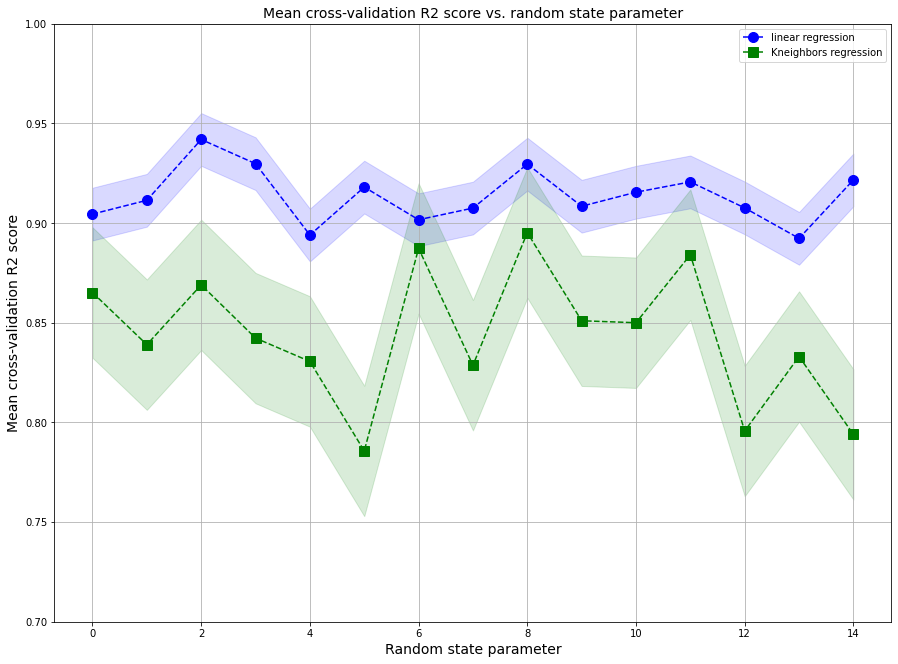

In [12]:
#Visualization of the variation of mean cross-validation R2 score
plt.figure(figsize=(15,11))

plt.plot(range(n),train_score_lr,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10, 
         label='linear regression')
plt.fill_between(range(n),
                 train_score_lr + train_std_lr,
                 train_score_lr - train_std_lr,
                 alpha=0.15, color='blue')
plt.plot(range(n),train_score_knn,color='green', linestyle='dashed', 
         marker='s',markerfacecolor='green', markersize=10, 
         label = 'Kneighbors regression')
plt.fill_between(range(n),
                 train_score_knn + train_std_knn,
                 train_score_knn - train_std_knn,
                 alpha=0.15, color='green')
plt.grid()
plt.ylim(0.7,1)
plt.title ('Mean cross-validation R2 score vs. random state parameter', size = 14)
plt.xlabel('Random state parameter', size = 14)
plt.ylabel('Mean cross-validation R2 score', size = 14)
plt.legend()
plt.show()



*   The light blue and light green shaded regions show the 68% confidence interval for the calculated R2 scores.
*   on average, the R2 score for linear regression is higher than that for KNN regression,(has less variance).





> Indented block
COnclusion
1.   In ML, it is always good to compare several models before selecting the best model.
2.   Consider the cuise dataset, the linear regression model performs better than KNN regression model.



